In [114]:
import ast
import pandas as pd 
import timeit
import numpy as np 
from statistics import mean

# Imports

In [115]:
#Import two data-sets
starbucks_df = pd.read_csv('./Clean_Data/Starbucks_Data.csv')
airbnb_df = pd.read_csv('./Clean_Data/AirBNB_Data.csv')
#Convert List columns stored as strings to lists
starbucks_df['airbnb_distances'] = starbucks_df['airbnb_distances'].apply(ast.literal_eval)
airbnb_df['starbucks_distances'] = airbnb_df['starbucks_distances'].apply(ast.literal_eval)
#Preview to verify
display(starbucks_df.head(1))
display(starbucks_df.info())

display(airbnb_df.head(1))
display(airbnb_df.info())

,store_id,index,countryCode,ownershipTypeCode,latitude,longitude,city,countrySubdivisionCode,postalCode,distance_to_den,airbnb_distances
0,1743,3739,US,CO,39.65278,-104.928197,Denver,CO,80222,6.65,"[8.77, 8.31, 7.12, 7.1, 7.03, 5.96, 6.87, 9.22..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   store_id                303 non-null    int64  
 1   index                   303 non-null    int64  
 2   countryCode             303 non-null    object 
 3   ownershipTypeCode       303 non-null    object 
 4   latitude                303 non-null    float64
 5   longitude               303 non-null    float64
 6   city                    303 non-null    object 
 7   countrySubdivisionCode  303 non-null    object 
 8   postalCode              303 non-null    int64  
 9   distance_to_den         303 non-null    float64
 10  airbnb_distances        303 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 26.2+ KB


None

,id,description,neighborhood_overview,host_neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,bathroom_count,starbucks_distances,starbucks_review_mentions
0,360,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,Highland,Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,...,5.0,5.0,5.0,4.91,f,2,2.87,1.0,"[8.77, 9.04, 9.19, 7.71, 7.6, 8.33, 7.4, 9.44,...",0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5367 entries, 0 to 5366
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5367 non-null   int64  
 1   description                     5367 non-null   object 
 2   neighborhood_overview           5367 non-null   object 
 3   host_neighbourhood              5367 non-null   object 
 4   neighbourhood_cleansed          5367 non-null   object 
 5   latitude                        5367 non-null   float64
 6   longitude                       5367 non-null   float64
 7   property_type                   5367 non-null   object 
 8   room_type                       5367 non-null   object 
 9   accommodates                    5367 non-null   int64  
 10  bathrooms_text                  5367 non-null   object 
 11  bedrooms                        5367 non-null   float64
 12  beds                            53

None

# Data Analytics

In [116]:
#Manually assigned distances of interest
bins = [.1, .25, .5, 1, 2, 5]
#Define a function that loops through each 'bin' (not technically correct)
#and counts starbucks within that range, then populate a column with that count
#for future plots
def airbnb_to_starbucks():
    for bin in bins:
        def nested_bin(row):
            dist_to_sb_list = row['starbucks_distances']
            sb_within_range = [x for x in dist_to_sb_list if x < bin]
            return len(sb_within_range)
        column_name = f"SB_within_{bin}_miles"
        airbnb_df[column_name] = airbnb_df.apply(nested_bin, axis=1)
# Run the function
airbnb_to_starbucks()
# Do it again for starbucks
def starbucks_to_airbnb():
    for bin in bins:
        def nested_bin(row):
            dist_to_bnb_list = row['airbnb_distances']
            bnb_within_range = [x for x in dist_to_bnb_list if x < bin]
            return len(bnb_within_range)
        column_name = f"Airbnb_within_{bin}_miles"
        starbucks_df[column_name] = starbucks_df.apply(nested_bin, axis=1)
starbucks_to_airbnb()

In [117]:
#calculate the average distance to the nearest 5 starbucks or bnbs
def mean_dist_nearest_5_sb(row):
    dist_list = row['starbucks_distances']
    dist_list.sort()
    return round(mean(dist_list[:5]),2)

def mean_dist_nearest_5_bnb(row):
    dist_list = row['airbnb_distances']
    dist_list.sort()
    return round(mean(dist_list[:5]),2)

airbnb_df['nearest_5_avg'] = airbnb_df.apply(mean_dist_nearest_5_sb, axis=1)
starbucks_df['nearest_5_avg'] = starbucks_df.apply(mean_dist_nearest_5_bnb, axis=1)

In [126]:
airbnb_df

,id,description,neighborhood_overview,host_neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,...,starbucks_review_mentions,SB_within_0.1_miles,SB_within_0.25_miles,SB_within_0.5_miles,SB_within_1_miles,SB_within_2_miles,SB_within_5_miles,nearest_5_avg,nearest_5_distance_bins,price_per_room
0,360,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,Highland,Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,...,0,0,0,1,5,21,49,0.74,3,45.000000
1,364,"Modern 1,000 square foot loft in the heart of ...","Ten brewpubs within walking distance, two grea...",Five Points,Five Points,39.766720,-104.979060,Entire loft,Entire home/apt,3,...,0,0,0,0,1,16,54,1.20,4,179.000000
2,590,"Large guest room in my home, where I also live...",I love the diversity of my neighborhood and it...,North Park Hill,North Park Hill,39.755110,-104.911090,Private room in home,Private room,3,...,0,0,0,1,2,7,48,0.93,3,-64.000000
3,592,This room is in the basement. It does not hav...,-1,North Park Hill,North Park Hill,39.754810,-104.911060,Private room in home,Private room,2,...,0,0,0,0,2,6,49,0.92,3,-57.000000
4,686,Thanks for visiting my Queen Bed Room site for...,"I love my Uptown neighborhood, which is within...",North Capitol Hill,North Capitol Hill,39.746950,-104.978380,Private room in home,Private room,2,...,0,1,1,1,9,23,60,0.48,2,-33.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5362,985655038490529659,"Blake's house is a captivating haven, blending...",-1,Highland,Highland,39.765313,-105.013120,Entire home,Entire home/apt,14,...,0,0,0,0,5,18,49,0.91,3,158.000000
5363,985699485774546946,This is a fully restored property in one of th...,-1,Washington Park,Elyria Swansea,39.783094,-104.964334,Entire home,Entire home/apt,3,...,0,0,0,0,0,1,46,2.17,5,31.666667
5364,986480371259464482,Enjoy an industrial experience at this central...,"Nicknamed “RiNo,” the trendy River North Art D...",Five Points,Five Points,39.756581,-104.988746,Entire rental unit,Entire home/apt,2,...,0,0,0,1,15,21,54,0.54,3,140.000000
5365,986558663097275426,Beautiful/private one bedroom with private mod...,-1,South Denver,Rosedale,39.677558,-104.983539,Private room in home,Private room,2,...,0,0,0,0,2,7,57,1.03,4,70.000000


In [128]:
#Add a column for "price per occupant" 
airbnb_df['price_per_occupant'] = airbnb_df['price']/airbnb_df['accommodates']

SB_within_0.5_miles
0     2457
1     1297
2      389
3       99
4       84
5       37
6       42
7        7
8       19
9       60
10      65
11      25
12       8
Name: review_scores_rating, dtype: int64

<Axes: xlabel='SB_within_0.5_miles'>

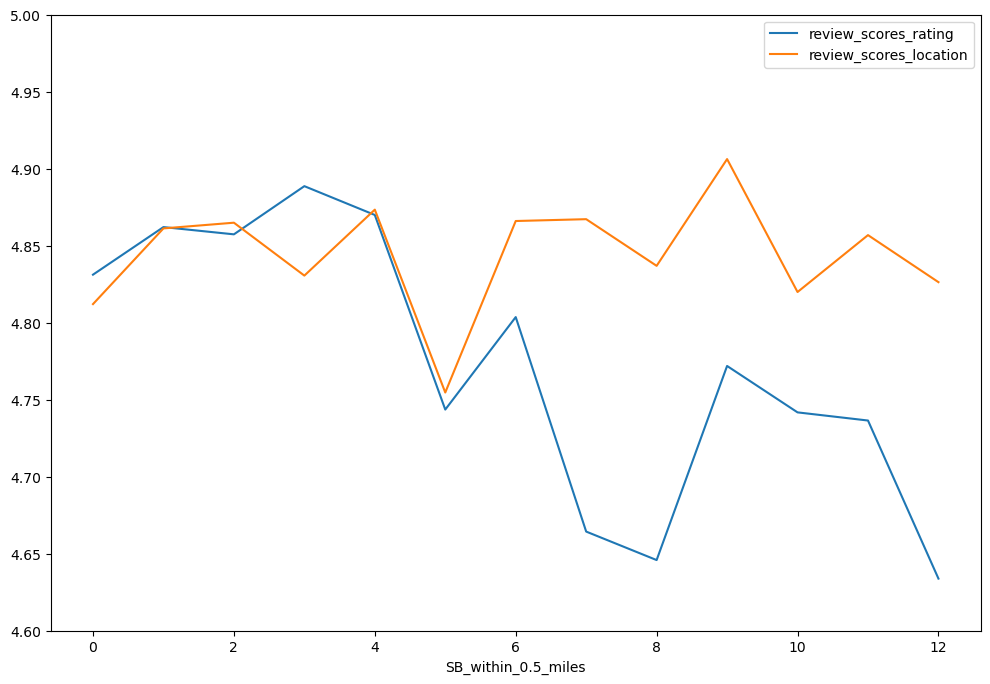

In [124]:
#Aggregate reviews by the number of SB within X miles
airbnb_df_reviewed_only = airbnb_df.loc[airbnb_df['review_scores_rating'] != -1]
aggregate_bnb_df = airbnb_df_reviewed_only.groupby(by=['SB_within_0.5_miles'])
agg_bnb_df_mean = aggregate_bnb_df[['price', 'review_scores_rating','review_scores_location']].mean()
display(aggregate_bnb_df['review_scores_rating'].count())
agg_bnb_df_mean[['review_scores_rating','review_scores_location']].plot(figsize=(12,8), ylim=(4.6,5))

<Axes: xlabel='nearest_5_avg', ylabel='review_scores_rating'>

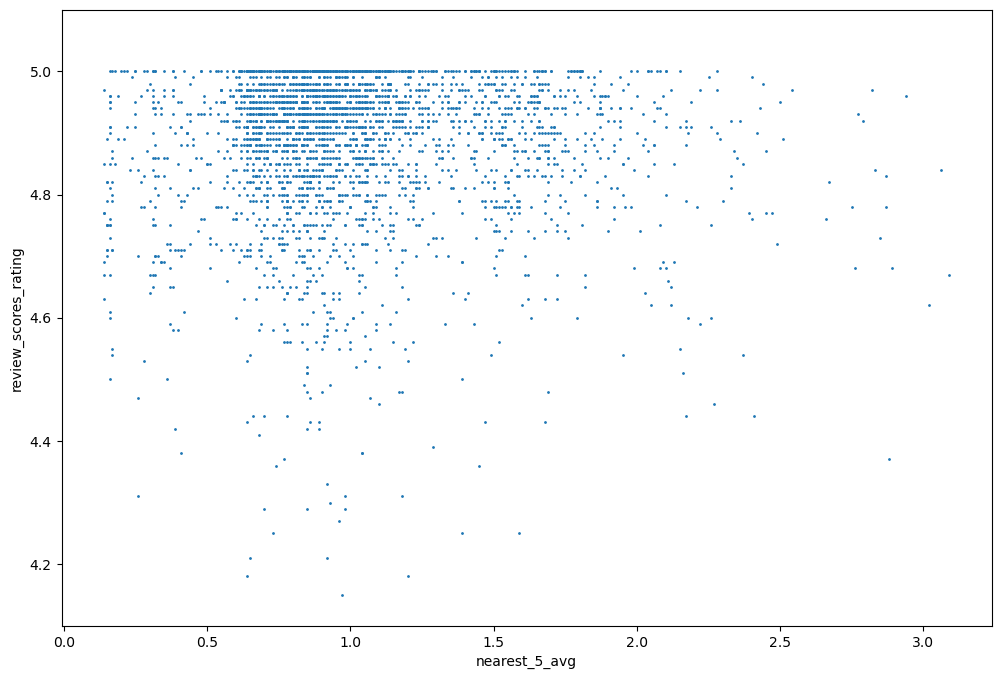

In [119]:
airbnb_df.loc[(airbnb_df['review_scores_rating'] != -1) & (airbnb_df['number_of_reviews'] > 10)].plot(x='nearest_5_avg', y='review_scores_rating', kind='scatter', ylim=(4.1, 5.1), figsize=(12,8), s=1)

C:\Users\matt.dipinto\AppData\Local\Temp\ipykernel_14296\50015109.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_near5_airbnb = airbnb_df.loc[airbnb_df['review_scores_rating'] != -1].groupby('nearest_5_distance_bins')


<Axes: xlabel='nearest_5_distance_bins'>

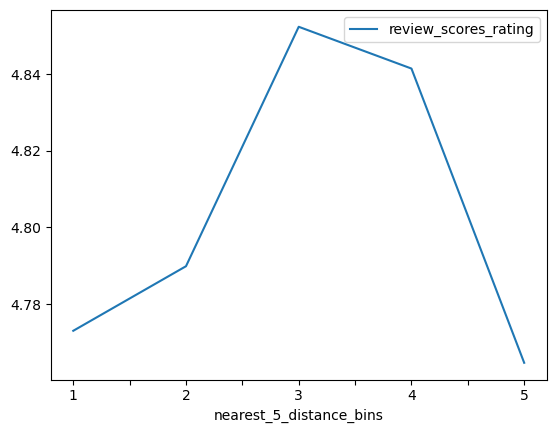

In [120]:
#actual binning of the data by nearest_5_avg
nearest_5_bins = [0, 0.25, 0.5, 1, 2, 5]
labels = [1,2,3,4,5]
airbnb_df['nearest_5_distance_bins']=pd.cut(airbnb_df['nearest_5_avg'], bins=nearest_5_bins, labels=labels)
grouped_near5_airbnb = airbnb_df.loc[airbnb_df['review_scores_rating'] != -1].groupby('nearest_5_distance_bins')
grouped_near5_airbnb[['review_scores_rating']].mean().plot()

# Testing that supported decisions while writing

In [121]:
#speed testing list comprehension vs. numpy eval:
def numpy_speed():
    data_list = starbucks_df['airbnb_distances'][0]
    numpy_array = np.array(data_list)
    nearby_distances = numpy_array[numpy_array < 1]
    nearby_distances = np.sort(nearby_distances)
    nearby_count = len(nearby_distances)
    return(nearby_count,nearby_distances)

time_taken_numpy = timeit.timeit(numpy_speed, number=5000)

def list_speed():
    data_list = starbucks_df['airbnb_distances'][0]
    keep_list = [x for x in data_list if x < 1]
    keep_list.sort()
    nearby_count = len(keep_list)
    return(nearby_count,keep_list)

time_taken_list = timeit.timeit(list_speed, number=1000)

print(f"numpy: {time_taken_numpy}")
print(f"list comprehension: {time_taken_list}")

#list comprehension was consistently ~5-10% faster

numpy: 1.1760495000053197
list comprehension: 0.2016506000654772
